<a href="https://colab.research.google.com/github/norayehia/graduation-facial-occluded-on-vrap-company/blob/main/2maskfacial1facial_v22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import  ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:




from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#t='C://Users//admin//Music//try2//New folder (2)100//train'
t='/content/drive/MyDrive/Final Dataset/trainset_occluded'

# data generator

In [ ]:
datagen = ImageDataGenerator(validation_split=0.2)
generator = datagen.flow_from_directory(t, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(t, # same directory as training data
    target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 9480 images belonging to 7 classes.
Found 2365 images belonging to 7 classes.


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# model

In [ ]:
model=tf.keras.models.Sequential(
[#16 filter ,inputshapesize200*200 RGB *3
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224, 224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #32 filter
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #activation and outputlayes
    tf.keras.layers.Dense(512,activation='relu'),
    #2clases need on nerron 
    tf.keras.layers.Dense(7,activation='softmax')
    
]
)

In [ ]:
import keras.utils 

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
model_fit=model.fit(
generator,
    
    epochs=100,
    validation_data=validation_generator
    

)

Epoch 1/100
297/297 [==============================] - 5165s 17s/step - loss: 22.4688 - categorical_accuracy: 0.4118 - val_loss: 2.7014 - val_categorical_accuracy: 0.3556
Epoch 2/100
297/297 [==============================] - 347s 1s/step - loss: 1.4464 - categorical_accuracy: 0.5047 - val_loss: 2.8025 - val_categorical_accuracy: 0.4249
Epoch 3/100
297/297 [==============================] - 346s 1s/step - loss: 1.2140 - categorical_accuracy: 0.5857 - val_loss: 2.2790 - val_categorical_accuracy: 0.4410
Epoch 4/100
297/297 [==============================] - 345s 1s/step - loss: 1.0472 - categorical_accuracy: 0.6436 - val_loss: 5.5223 - val_categorical_accuracy: 0.4419
Epoch 5/100
297/297 [==============================] - 345s 1s/step - loss: 0.8608 - categorical_accuracy: 0.6963 - val_loss: 4.1013 - val_categorical_accuracy: 0.4630
Epoch 6/100
297/297 [==============================] - 345s 1s/step - loss: 0.7242 - categorical_accuracy: 0.7474 - val_loss: 4.1477 - val_categorical_accura

In [ ]:

"""


# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

# Let's check:
np.testing.assert_allclose(
    model.predict(test_input), reconstructed_model.predict(test_input)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(test_input, test_target)


"""

In [ ]:
#model.save("/content/drive/MyDrive/my_modelv2")

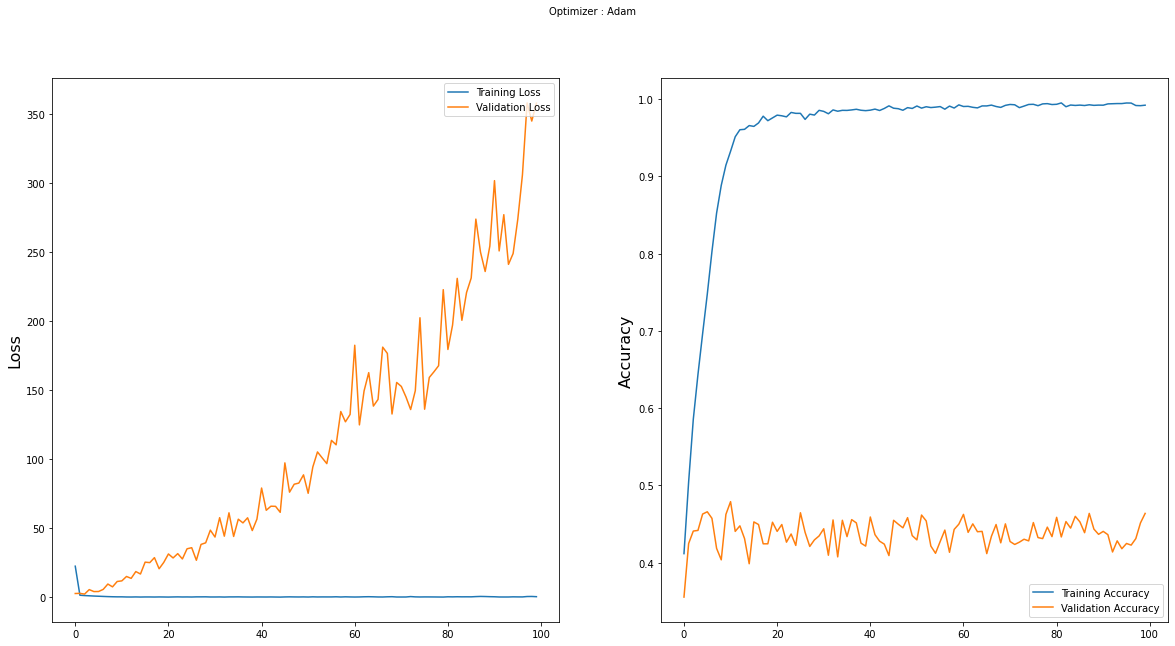

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_fit.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# testing

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/my_modelv2")

#test 






In [ ]:
test_dir ="/content/drive/MyDrive/Final Dataset/testset_occluded"

In [ ]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)



Found 3626 images belonging to 7 classes.


#accuracy

In [ ]:
reconstructed_model.evaluate(test_generator)

3626/3626 [==============================] - 653s 180ms/step - loss: 225.8342 - categorical_accuracy: 0.5359


[225.83421325683594, 0.5358521938323975]

In [ ]:
training_scores = reconstructed_model.evaluate(generator)
print("Accuracy = ", training_scores[1])

297/297 [==============================] - 1794s 6s/step - loss: 0.3294 - categorical_accuracy: 0.9927
Accuracy =  0.9927214980125427


In [ ]:
validation_scores = reconstructed_model.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])

74/74 [==============================] - 444s 6s/step - loss: 357.6962 - categorical_accuracy: 0.4638
Accuracy =  0.4638477861881256


In [ ]:
predict = reconstructed_model.predict(test_generator)
y_pred22 = tf.argmax(predict, axis=-1)
y_pred22

<tf.Tensor: shape=(3626,), dtype=int64, numpy=array([6, 6, 6, ..., 6, 6, 5])>

In [ ]:
y_test = test_generator.classes

In [ ]:
classes = ['Surprise', 'Fear', 'Disgust', 'Happy', 'Sad', 'Anger', 'Neutral']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred22, target_names = classes))

              precision    recall  f1-score   support

    Surprise       0.60      0.62      0.61       525
        Fear       0.62      0.53      0.57       536
     Disgust       0.64      0.74      0.68       221
       Happy       0.49      0.77      0.60       500
         Sad       0.57      0.36      0.44       739
       Anger       0.37      0.36      0.36       527
     Neutral       0.56      0.57      0.56       578

    accuracy                           0.54      3626
   macro avg       0.55      0.56      0.55      3626
weighted avg       0.54      0.54      0.53      3626



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred22)
print('Confusion matrix: \n{0}'.format(cm))

Confusion matrix: 
[[326  31  47  46   9  22  44]
 [ 89 285   4  56  33  33  36]
 [  8   3 163  24   3  15   5]
 [ 19  14   5 386  17  28  31]
 [ 32  62  24 117 265 155  84]
 [ 38  39   7 110  82 191  60]
 [ 29  27   6  54  56  79 327]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
import seaborn as sns

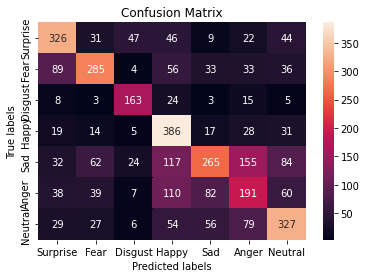

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [ ]:
missclassifications = []
missclassified_images = []
for i in range(len(y_pred22)):
  if y_pred22[i] != y_test[i]:
    missclassifications.append(y_pred22[i])
    missclassified_images.append(test_generator[i])
print(len(missclassifications))

1683


In [ ]:
(unique, label_counts) = np.unique(missclassifications, return_counts=True)

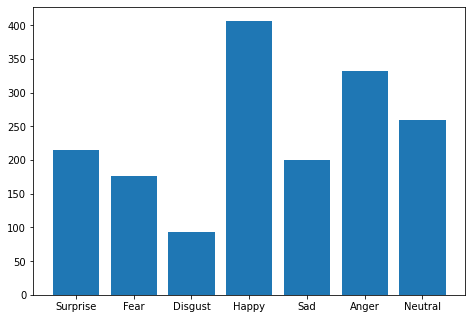

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(classes,label_counts)
plt.show()

https://stackoverflow.com/questions/45806669/how-to-use-predict-generator-with-imagedatagenerator#comment113791242_45814333